In [2]:
import zipfile

In [3]:
with zipfile.ZipFile("parkinsons.zip", "r") as zip_ref:
    zip_ref.extractall()

In [54]:
#Import libraries
import numpy as np
import pandas as pd
import os, sys
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [67]:
df = pd.read_csv("parkinsons.data")
print(df.shape)
df.head()

(195, 24)


,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [39]:
df.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [68]:
#Get features and Labels
#Features are all the columns except 'status'
features = df.loc[:,df.columns != "status"].values[:,1:]
features

array([[119.992, 157.302, 74.997, ..., 0.266482, 2.301442, 0.284654],
       [122.4, 148.65, 113.819, ..., 0.33559, 2.486855, 0.368674],
       [116.682, 131.111, 111.555, ..., 0.311173, 2.342259, 0.332634],
       ...,
       [174.688, 240.005, 74.287, ..., 0.158453, 2.679772, 0.131728],
       [198.764, 396.961, 74.904, ..., 0.207454, 2.138608, 0.123306],
       [214.289, 260.277, 77.973, ..., 0.190667, 2.555477, 0.148569]],
      dtype=object)

In [69]:
#Labels is the column that includes 'status'
labels = df.loc[:, "status"].values
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [70]:
#Count for 0 and 1
print(labels[labels==1].shape[0], labels[labels==0].shape[0])

147 48


In [71]:
#Initialize the MinMax Scaler to a range of -1, 1
"""MinMaxScaler is used to transform features by scaling them within a given range. No need to scale the labels"""
scaler = MinMaxScaler((-1, 1))

In [72]:
#Fit transform the scaler to fit the features
X = scaler.fit_transform(features)
# Labels are going to be our y
y = labels

In [73]:
#Split the dataset into train set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [108]:
#Initialize Regularized XGBClassifier.
"""Acts as an extreme gradient booster to provide a superior output. Falls under Ensemble in ML models. 
Regularizing the model prevents overfitting"""
model = XGBClassifier(reg_alpha=1, reg_lambda=1)


#Fit model
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [75]:
#Calculate accuracy scores
y_pred = model.predict(X_test)
acc_score = accuracy_score(y_test, y_pred)*100
acc_score

94.87179487179486

In [76]:
#Improve model
"""Check whether the data is balanced or imbalanced. We use Synthetic Minority Oversampling Technique to balance the data(SMOTE)"""
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)
X_train_balanced, y_train_balanced

(array([[-0.62486319, -0.88153546, -0.44372287, ...,  0.31843528,
         -0.32000189,  0.29750553],
        [-0.74244929, -0.89603274, -0.53852177, ...,  0.42168615,
          0.07524641, -0.23873512],
        [-0.41949794, -0.58611919, -0.79430493, ..., -0.30667981,
         -0.40641443, -0.23221934],
        ...,
        [ 0.67302889, -0.44463272,  0.84324725, ..., -0.87238971,
         -0.07614995, -0.79891747],
        [-0.63518779, -0.90488232, -0.51732005, ..., -0.11009404,
         -0.57369903, -0.54437725],
        [ 0.47888304, -0.36455684, -0.82829518, ..., -0.22461797,
         -0.01694649, -0.59326146]]),
 array([1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
        0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
        1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
        1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
   

In [107]:
#Cross Validation
""" Instead of depending on a single split, let's use the K-fold cross-validation to estimate my model's performance better"""
from sklearn.model_selection import cross_val_score
model = XGBClassifier()
cross_scores = cross_val_score(model, X, y, cv=5, scoring="accuracy")
print("Cross-validated accuracy: {:.2f}%".format(cross_scores.mean() * 100))

Cross-validated accuracy: 82.56%


In [109]:
#Hyperparameter tuning.
"""The cross-validation score is less than the accuracy score thus suggesting that the model is not well
generalized to unseen data indicating overfitting or suboptimal model configuration"""
from sklearn.model_selection import GridSearchCV

#Define param_grid
param_grid = {
    "learning_rate": [0.01, 0.1, 0.2],
    "max_depth": [3, 5, 7],
    "n_estimators": [50, 100, 200],
    "subsample": [0.7, 0.8, 1.0],
    "colsample_bytree": [0.7, 0.8, 1.0]
}
#Initialize model
model = XGBClassifier()

#Gridsearch
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring="accuracy", cv=5, verbose=1)
grid_search.fit(X_train, y_train)

#Best parameters of the model
print(grid_search.best_params_)

#Best model
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


C:\Users\Admin\PracticePage\PracticePageProjects\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


{'colsample_bytree': 0.7, 'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.7}


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [97]:
#Ensure Balanced proportions across splits using K-fold cross-validation
from sklearn.model_selection import StratifiedKFold, cross_val_score

# Stratified K-Fold Cross Validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model, X, y, cv=skf, scoring='accuracy')
print(f"Stratified Cross-Validated Accuracy: {scores.mean() * 100:.2f}%")


Stratified Cross-Validated Accuracy: 91.28%


In [104]:
#Reduce dimensionality
from sklearn.decomposition import PCA

# Reduce to 10 principal components
pca = PCA(n_components=10)  
x_pca = pca.fit_transform(X)

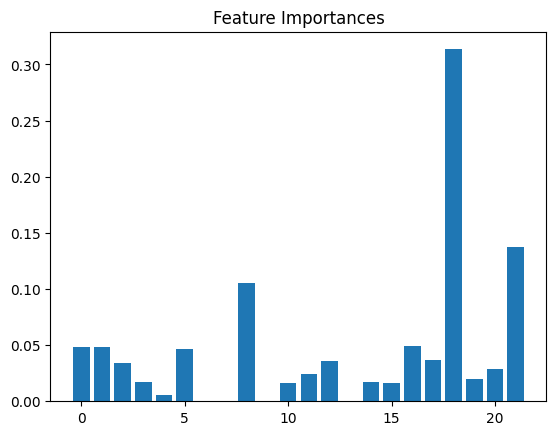

In [102]:
#Analyze feature importance
feature_importances = model.feature_importances_
plt.bar(range(len(feature_importances)), feature_importances)
plt.title("Feature Importances")
plt.show()

In [103]:
#Additional Metrics
"""Accuracy score alone is not sufficient for medical applications. We need to find other metrics
like precision, recall, f1 score to train our model better"""
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
#Generate prediction
y_pred = model.predict(X_test)

#Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}%")

#Precision Score(proportion of actual positive predictions that are correct. Minimizes False Positives)
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.2f}")

#Recall Score(Proportion of positives correctly identified. Minimizes false negatives)
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.2f}")

#f1 Score(Harmonic mean of both precsion and recall)
f1 = f1_score(y_test, y_pred)
print(f"f1: {f1:.2f}")

#Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{cm}")

#Classification Report (contains all the metrics)
print("n\Classificatio Report:")
print(classification_report(y_test, y_pred))

Accuracy: 94.87%
Precision: 0.94
Recall: 1.00
f1: 0.97
Confusion Matrix:
[[ 5  2]
 [ 0 32]]
n\Classificatio Report:
              precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.94      1.00      0.97        32

    accuracy                           0.95        39
   macro avg       0.97      0.86      0.90        39
weighted avg       0.95      0.95      0.95        39



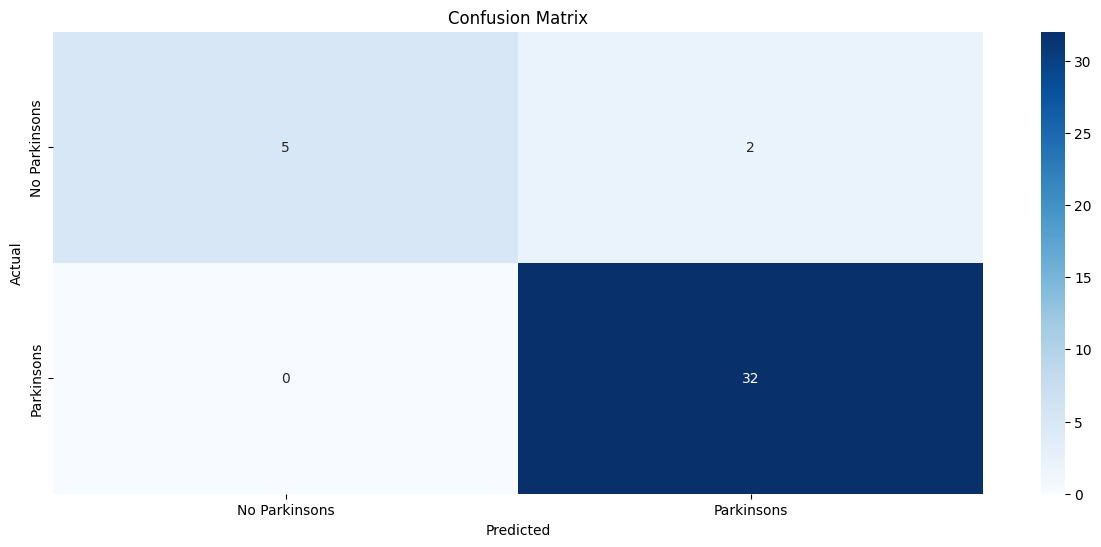

In [99]:
#Visualize the confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Parkinsons', 'Parkinsons'], yticklabels=['No Parkinsons', 'Parkinsons'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
            